In [3]:
import pandas as pd
data=pd.read_csv("routine_dataset.csv")

Working Hours              -0.437829
Sleep Hours                 0.205153
Rank of Mood                0.569334
Rank of Food Quality        0.815550
Rank of Health Condition    0.829135
Rank of Productivity        1.000000
Name: Rank of Productivity, dtype: float64

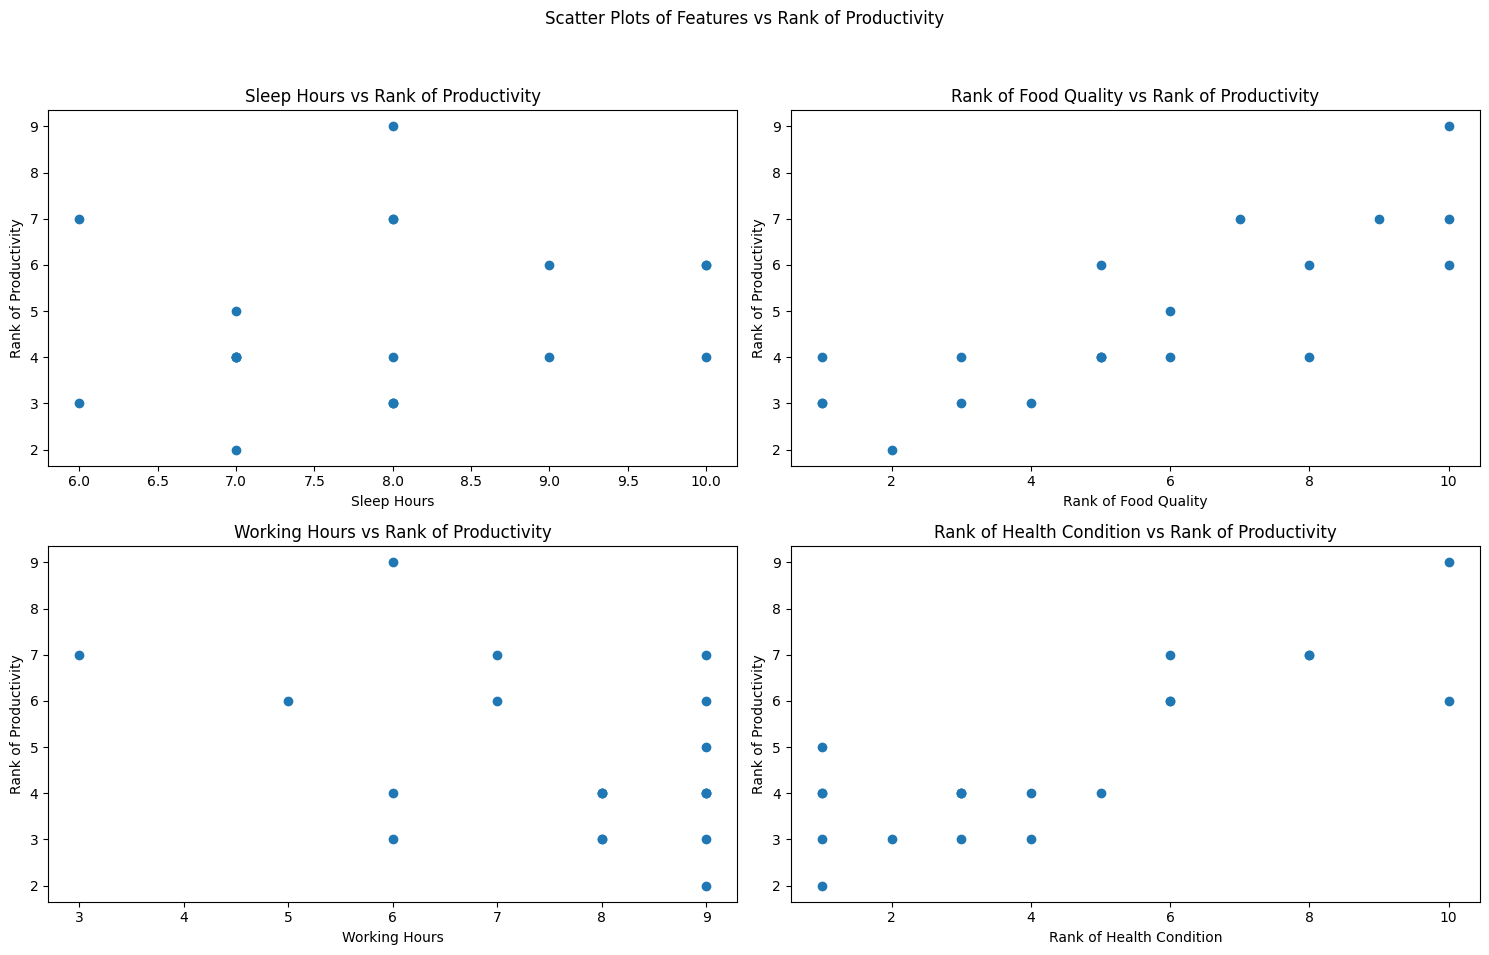

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
data = data.drop(columns=['Unnamed: 0'])
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Scatter Plots of Features vs Rank of Productivity')
features = ['Sleep Hours', 'Rank of Food Quality', 'Working Hours', 'Rank of Health Condition']

for ax, feature in zip(axes.flat, features):
    ax.scatter(data[feature], data['Rank of Productivity'])
    ax.set_title(f'{feature} vs Rank of Productivity')
    ax.set_xlabel(feature)
    ax.set_ylabel('Rank of Productivity')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

correlations = data.corr()['Rank of Productivity'].sort_values()

correlations


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
normalized_data.head()


,Sleep Hours,Rank of Food Quality,Working Hours,Rank of Health Condition,Rank of Mood,Rank of Productivity
0,1.0,1.000000,1.000000,0.555556,0.222222,0.571429
1,0.5,1.000000,0.500000,1.000000,1.000000,1.000000
2,0.5,0.000000,0.833333,0.333333,0.222222,0.142857
3,1.0,0.444444,0.833333,0.000000,0.333333,0.285714
4,1.0,0.777778,0.666667,0.555556,0.333333,0.571429


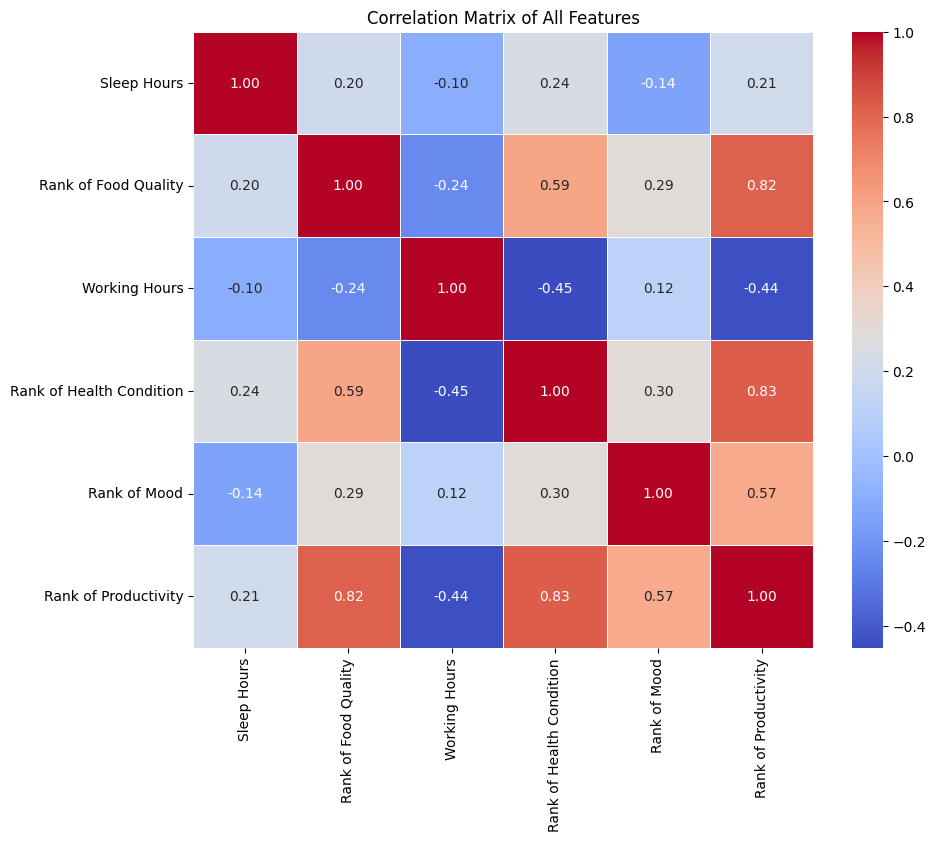

In [12]:

correlation_matrix = normalized_data.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of All Features')
plt.show()


In [7]:
import numpy as np

# Constants
learning_rate = 0.01
epochs = 500
n_features = normalized_data.shape[1] - 1  # Exclude the target variable

# Initialize parameters
np.random.seed(42)  # for reproducibility
m = np.random.rand(n_features)  # slope coefficients for each feature
c = np.random.rand()  # intercept

# Separate features and target variable
X = normalized_data.drop(columns=['Rank of Productivity']).values
y = normalized_data['Rank of Productivity'].values

# Gradient Descent
loss_history = []
m_history = [m.copy()]  # to track changes in parameters
c_history = [c]  # to track changes in parameters

for epoch in range(epochs):
    y_pred = np.dot(X, m) + c  # prediction
    error = y_pred - y  # error in prediction
    loss = np.mean(error ** 2)  # mean squared error
    loss_history.append(loss)
    
    # Gradient calculation
    m_gradient = (2/len(X)) * np.dot(error, X)
    c_gradient = (2/len(X)) * np.sum(error)
    
    # Update parameters
    m -= learning_rate * m_gradient
    c -= learning_rate * c_gradient
    
    # Store history for visualization
    m_history.append(m.copy())
    c_history.append(c)

    # Print the process every 50 epochs
    if epoch % 50 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss:.4f}")

# Final parameters
m_final = m
c_final = c

loss_history[-1], m_final, c_final


Epoch 1, Loss: 1.6727
Epoch 51, Loss: 0.0391
Epoch 101, Loss: 0.0253
Epoch 151, Loss: 0.0235
Epoch 201, Loss: 0.0219
Epoch 251, Loss: 0.0205
Epoch 301, Loss: 0.0192
Epoch 351, Loss: 0.0180
Epoch 401, Loss: 0.0169
Epoch 451, Loss: 0.0159


(0.015040474784649455,
 array([0.06469787, 0.53735269, 0.20922636, 0.39573371, 0.08990159]),
 -0.25424802365990995)

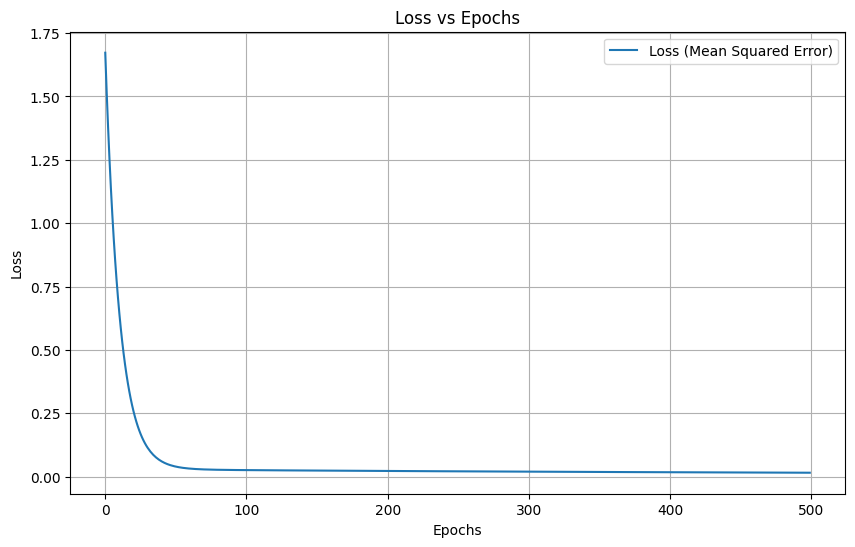

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(loss_history, label='Loss (Mean Squared Error)')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


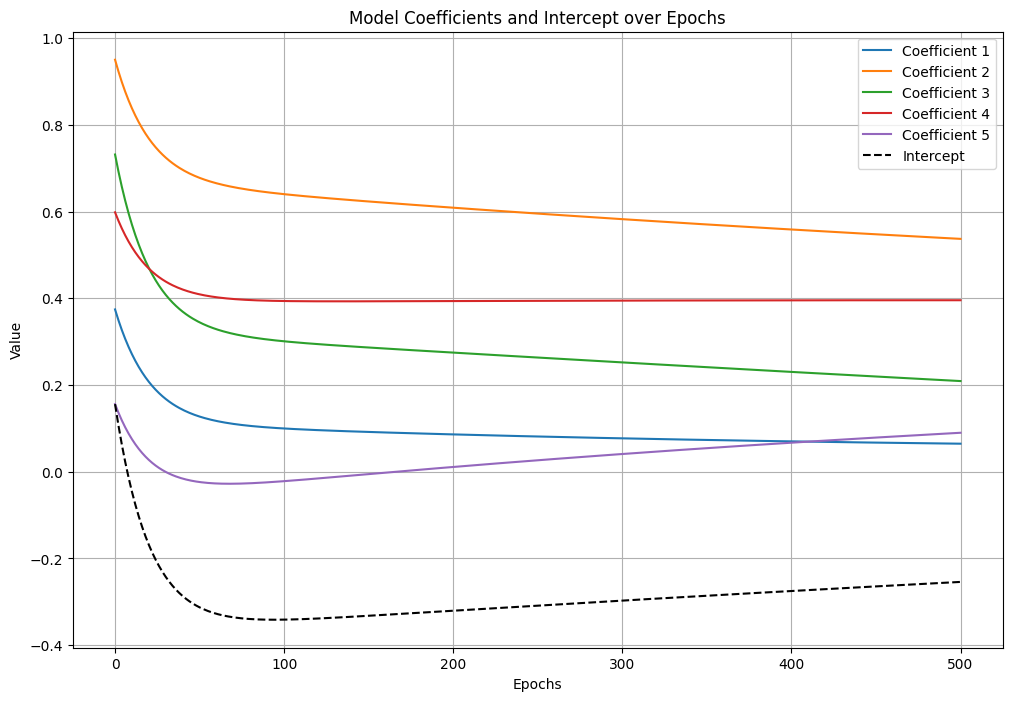

In [9]:

m_history = np.array(m_history)
c_history = np.array(c_history)

plt.figure(figsize=(12, 8))
for i in range(m_history.shape[1]):
    plt.plot(m_history[:, i], label=f'Coefficient {i+1}')

plt.plot(c_history, label='Intercept', color='black', linestyle='--')
plt.title('Model Coefficients and Intercept over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


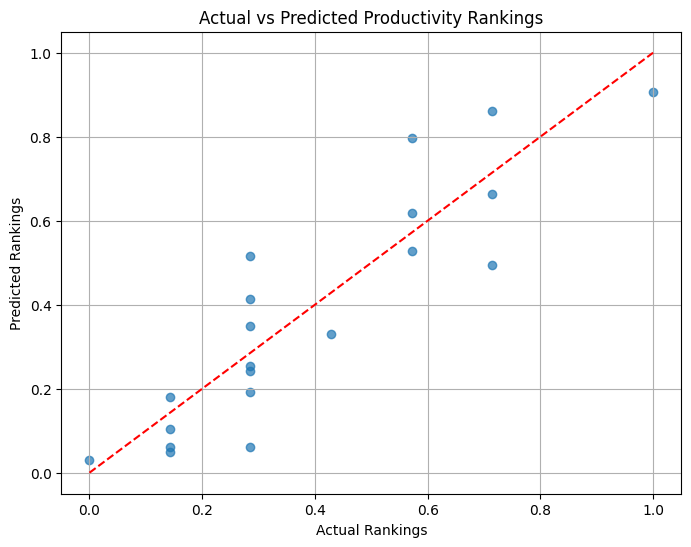

In [10]:

final_predictions = np.dot(X, m_final) + c_final

plt.figure(figsize=(8, 6))
plt.scatter(y, final_predictions, alpha=0.7)
plt.title('Actual vs Predicted Productivity Rankings')
plt.xlabel('Actual Rankings')
plt.ylabel('Predicted Rankings')
plt.plot([0, 1], [0, 1], 'r--')
plt.grid(True)
plt.show()
